In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from zipline.api import order_target, record, symbol
from zipline.examples import buyapple

In [2]:
%load_ext zipline
%matplotlib inline

## Доступ к Zipline

Zipline - это библиотека алгоритмической торговли, которая поддерживает платформу Quantopian для тестирования и торговли в реальном времени. Он также доступен в автономном режиме для разработки стратегии с использованием ограниченного количества бесплатных пакетов данных, которые могут быть получены и использованы для проверки эффективности торговых идей перед переносом результата на онлайн-платформу Quantopian для бумажной и реальной торговли.

#### Доступ к данным

In [3]:
!zipline bundles

csvdir <no ingestions>
quandl 2021-01-27 06:01:18.355932
quandl 2021-01-27 05:53:20.128614
quandl 2021-01-27 05:53:00.211828
quandl 2021-01-27 05:46:21.243922
quandl 2021-01-27 05:45:15.866335
quantopian-quandl <no ingestions>


In [8]:
from os import getenv
QUANDL_API_KEY = getenv('QUANDL_API_KEY', None)
if not QUANDL_API_KEY:
    print('No QUANDL_API_KEY environment variable; please enter key manually below')

In [2]:
!zipline ingest

[2021-01-27 06:38:31.075437] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2021-01-27 06:39:29.975556] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2021-01-27 06:39:57.269411] INFO: zipline.data.bundles.quandl: Generating asset metadata.
Merging daily equity files:  [-----------------#------------------]  1731/home/likeagod/anaconda3/envs/ml4t-zipline/lib/python3.5/site-packages/zipline/data/bcolz_daily_bars.py:367: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, 'volume', *OHLC)
Merging daily equity files:  [####################################]      
[2021-01-27 06:42:54.582694] INFO: zipline.data.bundles.quandl: Parsing split data.
[2021-01-27 06:42:54.812376] INFO: zipline.data.bundles.quandl: Parsing dividend data.
/home/likeagod

In [9]:
%%zipline --start 2010-1-1 --end 2019-1-1 --data-frequency daily
from zipline.api import order_target, record, symbol
import pandas as pd

def initialize(context):
    context.i = 0
    context.assets = [symbol('FB'), symbol('GOOG'), symbol('AMZN')]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.to_frame().reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', index=False, mode='a', header=None)
    context.i += 1

[2021-01-27 06:44:22.375185] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2021-01-27 05:54:32.612935+00:00.
[2021-01-27 06:44:22.410393] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2021-01-27 05:54:36.533007+00:00.
[2021-01-27 06:46:41.109082] INFO: zipline.finance.metrics.tracker: Simulated 2264 trading days
first open: 2010-01-04 14:31:00+00:00
last close: 2018-12-31 21:00:00+00:00


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,-0.000443,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,-0.000886,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,-0.001329,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,-0.001772,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,-0.002214,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,-0.002657,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,-0.003099,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,-0.003540,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,-0.003982,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,-0.004424,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


asset
Equity(1037 [FB])      AxesSubplot(0.125,0.2;0.775x0.68)
Equity(1244 [GOOG])    AxesSubplot(0.125,0.2;0.775x0.68)
Equity(167 [AMZN])     AxesSubplot(0.125,0.2;0.775x0.68)
Name: price, dtype: object

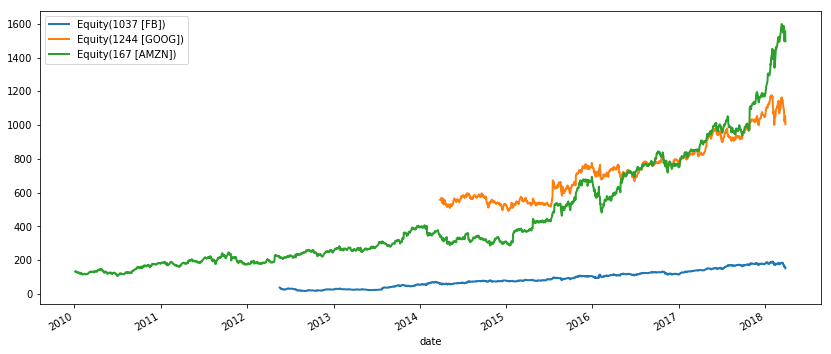

In [12]:
df = pd.read_csv('stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(14, 6))

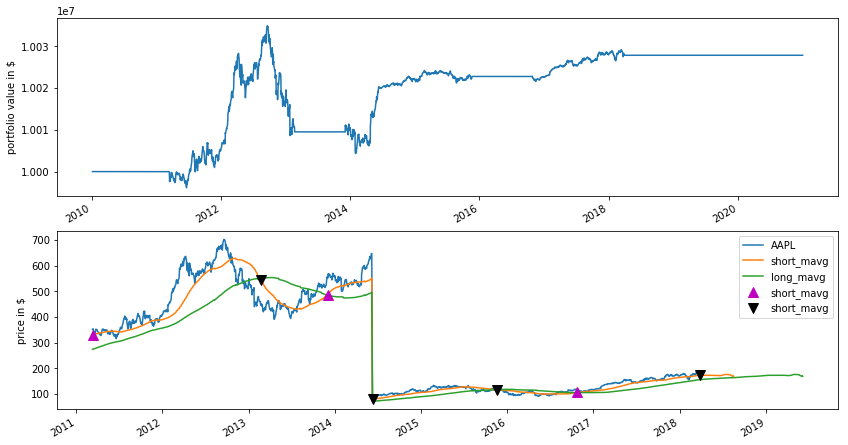

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.000443,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.000886,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.001329,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.001772,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.002214,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.002657,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.003099,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.003540,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.003982,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.004424,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [4]:
%%zipline --start 2010-1-1 --end 2021-1-1 -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(14, 8))
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show() 